<a href="https://colab.research.google.com/github/m-l-kang/cs-178-proj/blob/main/final_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torchvision
seed = 1234

In [ ]:
data_path = '/content/drive/MyDrive/cs_178_project/data/cifar-10-batches-py'

# https://github.com/deep-diver/CIFAR10-img-classification-tensorflow/blob/master/CIFAR10_image_classification.py
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

def load_cfar10_test(cifar10_dataset_folder_path):
  with open(cifar10_dataset_folder_path + '/test_batch', mode = 'rb') as file:
    test = pickle.load(file, encoding = 'latin1')

  features = test['data'].reshape((len(test['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
  labels = test['labels']

  return features, labels
   

In [ ]:
batch_1 = load_cfar10_batch(data_path, 1)
batch_2 = load_cfar10_batch(data_path, 2)
batch_3 = load_cfar10_batch(data_path, 3)
batch_4 = load_cfar10_batch(data_path, 4)
batch_5 = load_cfar10_batch(data_path, 5)

final_test_set = load_cfar10_test(data_path)

In [ ]:
features, labels = final_test_set[0], final_test_set[1]

print('# of Samples: {}\n'.format(len(features)))

label_names = load_label_names()
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
for key, value in label_counts.items():
  print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
  sample_image = features[1]
  sample_label = labels[1]

  print('\nExample of Image {}:'.format(1))
  print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
  print('Image - Shape: {}'.format(sample_image.shape))
  print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))

# of Samples: 10000

Label Counts of [0](AIRPLANE) : 1000

Example of Image 1:
Image - Min Value: 0 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship
Label Counts of [1](AUTOMOBILE) : 1000

Example of Image 1:
Image - Min Value: 0 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship
Label Counts of [2](BIRD) : 1000

Example of Image 1:
Image - Min Value: 0 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship
Label Counts of [3](CAT) : 1000

Example of Image 1:
Image - Min Value: 0 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship
Label Counts of [4](DEER) : 1000

Example of Image 1:
Image - Min Value: 0 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship
Label Counts of [5](DOG) : 1000

Example of Image 1:
Image - Min Value: 0 Max Value: 247
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship
Label Counts of [6](FROG) : 1000

Example of Image 1:
Image - Min Value: 0 Max Valu

In [ ]:
# large data set
all_features = np.concatenate((batch_1[0], batch_2[0], batch_3[0], batch_4[0], batch_5[0]))
all_labels = np.concatenate((batch_1[1], batch_2[1], batch_3[1], batch_4[1], batch_5[1]))

features, labels = all_features, all_labels

print('# of Samples: {}\n'.format(len(features)))

label_names = load_label_names()
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
for key, value in label_counts.items():
    print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))


# of Samples: 50000

Label Counts of [0](AIRPLANE) : 5000
Label Counts of [1](AUTOMOBILE) : 5000
Label Counts of [2](BIRD) : 5000
Label Counts of [3](CAT) : 5000
Label Counts of [4](DEER) : 5000
Label Counts of [5](DOG) : 5000
Label Counts of [6](FROG) : 5000
Label Counts of [7](HORSE) : 5000
Label Counts of [8](SHIP) : 5000
Label Counts of [9](TRUCK) : 5000


In [ ]:
X_tr_all, _, y_tr_all, _ = train_test_split(all_features, all_labels, test_size = 0.2, random_state = seed)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from keras.utils.np_utils import to_categorical 
from sklearn.linear_model import LogisticRegression

In [ ]:
X_te_final = final_test_set[0]
y_te_final = np.asarray(final_test_set[1])

X_tr_all_not_shaped = X_tr_all
X_te_final_not_shaped = X_te_final

X_tr_all = np.reshape(X_tr_all,(40000,3072))
X_tr_all = X_tr_all.astype('float32')
X_te_final = np.reshape(X_te_final, (10000, 3072))
X_te_final = X_te_final.astype('float32')
# Normalization of pixel values (to [0-1] range)
X_tr_all /= 255
X_te_final /= 255

print("Shape of training data:")
print(X_tr_all.shape)
print(y_tr_all.shape)
print("Shape of test data:")
print(X_te_final.shape)
print(y_te_final.shape)
print("Shape of validation data:")
print(y_tr_all.shape)
print(y_tr_all.shape)

Shape of training data:
(40000, 3072)
(40000,)
Shape of test data:
(10000, 3072)
(10000,)
Shape of validation data:
(40000,)
(40000,)


In [ ]:
# kNN

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_tr_all,y_tr_all) 

knn_predict_train = knn.predict(X_tr_all)
knn_predict_test = knn.predict(X_te_final)

knn_acc_train = accuracy_score(y_tr_all, knn_predict_train)
knn_acc_test = accuracy_score(y_te_final, knn_predict_test)

print(f'--- Accuracy (train): {knn_acc_train}') 
print(f'--- Accuracy (test): {knn_acc_test}')

sklearn_cm = confusion_matrix(y_te_final, knn_predict_test)     
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)     
sklearn_disp.plot()

KeyboardInterrupt: ignored

In [ ]:
# logistic

classifier = LogisticRegression(penalty='l1', C = 0.1, solver = 'saga', max_iter = 300, 
                                fit_intercept=True)

classifier.fit(X_tr_all, y_tr_all)

train_pred = classifier.predict(X_tr_all)
test_pred = classifier.predict(X_te_final)

log_acc_train = accuracy_score(y_tr_all, train_pred)
log_acc_test = accuracy_score(y_te_final, test_pred)

print(f'--- Accuracy (train): {log_acc_train}') 
print(f'--- Accuracy (test): {log_acc_test}')

sklearn_cm = confusion_matrix(y_te_final, test_pred)     
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)     
sklearn_disp.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
sc = StandardScaler()
transformed_X_tr = sc.fit_transform(X_tr_all)
transformed_X_val = sc.fit_transform(X_te_final)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.4251


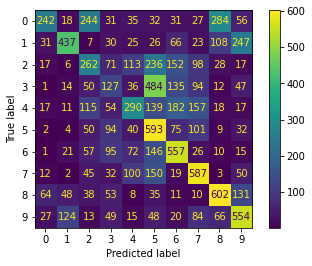

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (128, 64), activation = 'relu',
                          learning_rate_init = 0.01, solver = 'adam',
                          n_iter_no_change = 150, max_iter = 100, alpha = 0.001,
                          batch_size = 200,
                          random_state = seed).fit(transformed_X_tr, y_tr_all)

result = mlp_clf.predict(transformed_X_val)

print(accuracy_score(y_te_final, result))

sklearn_cm = confusion_matrix(y_te_final, result)     
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)     
sklearn_disp.plot()

In [ ]:
# convolutional 
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

In [ ]:


#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)

  testX = X_te_final_not_shaped
  testY = y_te_final

  testY = to_categorical(testY)

  return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [ ]:
# define cnn model
# dropout regularization
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate = 0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history, title):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_' + title + '_plot.png')
  pyplot.close()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # fit model
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history, 'final')
 
# entry point, run the test harness
run_test_harness()